In [1]:
library(ggplot2)
require(graphics)
library(reshape2)
library(grid)
source("http://peterhaschke.com/Code/multiplot.R")
library(locfit)

locfit 1.5-9.1 	 2013-03-22


In [2]:
jul = data.frame(matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)) #lat, lon, elev, P
colnames(jul) = c("lat","lon","elev","P")

print(length(jul[,1]))

jul = jul[complete.cases(jul),]

[1] 626


stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


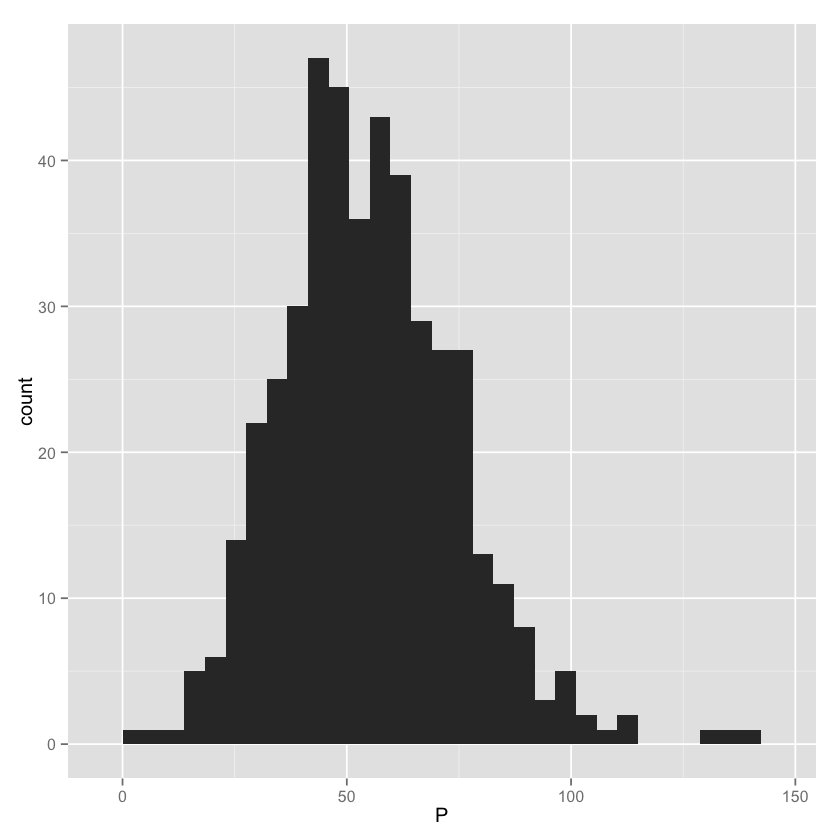

In [3]:
ggplot(jul)+geom_histogram(aes(x=P))

**Figure:** Distribution doesn't cross zero so try a gamma distribution first

In [4]:
# generate models

mods = c("P ~ lat + lon + elev",
        "P ~ lat + lon",
        "P ~ lat + elev",
        "P ~ elev + lon",
        "P ~ lat",
        "P ~ lon",
        "P ~ elev")

params = c(3,2,2,2,1,1,1) # model complexity

mods = matrix(c(T,T,T,T,T,F,T,F,T,F,T,T,T,F,F,F,T,F,F,F,T),7,3, byrow = T)
tmp = matrix(scan('http://cires1.colorado.edu/~aslater/CVEN_6833/colo_monthly_precip_07.dat',
                             na.strings = '-999.999'),ncol=4,byrow=T)
y = tmp[,4]
X = tmp[,1:3]

In [5]:
gcv_scr = rep(0,7) # preallocate
model = gcv_scr

ct = 1
for (i in 1:7){ # loop through the models
            
            mod = glm(y ~ X[,mods[i,]],family = Gamma(link='inverse'))
            
            tmp = gcv(mod)
            
            gcv_scr[ct] = gcv(mod)[4]
            model[ct] = i
            
            ct = ct +1 # advance the indexer
}

In [6]:
gcv_scr

[1] 184.3223 274.7386 324.7527 207.3087 374.2453 309.9080 349.6220

In [ ]:
mod